# Algoritmo de Deutsch-Jozsa

__Definição.__ Uma função
$$f:\{0,1\}^{n}\rightarrow \{0,1\},$$
é constante se
$$f(x)=f(y)\ \forall x,y\in \{0,1\}^{n}$$
e balanceada se
$$f(x)=0$$
para metade ($2^n/2 = 2^{n-1}$) dos números em $\{0,1\}^{n}=\{0,1,2,\cdots,2^n -2,2^n -1\}$ e
$$f(y)=1$$
para a outra metade. $\square$

Aqui novamente estaremos interessados em resolver o __problema de Deutsch__, ou seja, dada uma caixa preta que implementa a função $f$, queremos determinar se $f$ é constante ou balanceada usando o menor número possível de consultas a essa caixa preta.

O circuito da figura abaixo ilustra o algoritmo quântico
de Deutsch-Jozsa para resolver esse problema consultando a caixa preta uma única vez.

![](https://drive.google.com/uc?export=view&id=1MoHXCAVsMsDTAU9oUZyhYwnqDndcXgrv)

Temos que
\begin{align}
|\psi_{0}\rangle & = |0\rangle^{\otimes n}|1\rangle \\
& \equiv |0\rangle\otimes\cdots\otimes|0\rangle\otimes|1\rangle.
\end{align}
Aplicando as portas de Hadamard, criamos a superposição de estados
\begin{align}
|\psi_{1}\rangle & = H^{\otimes n}H|\psi_{0}\rangle \\
& = H|0\rangle\otimes\cdots\otimes H|0\rangle\otimes H|1\rangle \\
& = |+\rangle\otimes\cdots\otimes |+\rangle\otimes |-\rangle \\
& = |+\rangle^{\otimes n}|-\rangle.
\end{align}
Usando alguns exemplos, veremos como o estado acima poder ser escrito como uma superposição:
\begin{align}
|+\rangle & = \frac{1}{2^{1/2}}\big(|0\rangle + |1\rangle\big) = \frac{1}{2^{1/2}}\sum_{x_{0}=0}^{1}|x_{0}\rangle, \\
|+\rangle^{\otimes 2} & = \frac{1}{2^{1/2}}\big(|0\rangle + |1\rangle\big)\frac{1}{2^{1/2}}\big(|0\rangle + |1\rangle\big) \\
& = \frac{1}{2^{2/2}}\big(|00\rangle + |01\rangle + |10\rangle + |11\rangle\big) \\
& = \frac{1}{2^{2/2}}\sum_{x_{1}=0}^{1}\sum_{x_{0}=0}^{1}|x_{1}x_{0}\rangle, \\
& \vdots \\
|+\rangle^{\otimes n} & = \frac{1}{2^{n/2}}\sum_{x_{n-1}=0}^{1}\cdots\sum_{x_{1}=0}^{1}\sum_{x_{0}=0}^{1}|x_{n-1}\cdots x_{1}x_{0}\rangle \\
& = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}|x\rangle, \\
\end{align}
Notemos que cada sequência
$$x_{n-1}\cdots x_{1}x_{0}$$
 nos fornece a representação binária, com $n$ bits, do número com representação decimal
$$x = x_{0}2^{0}+x_{1}2^{1}+\cdots+x_{n-1}2^{n-1}=\sum_{j=0}^{n-1}x_j 2^j\ \in[0,2^{n}-1].$$

Teremos assim que
$$|\psi_{1}\rangle = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}|x\rangle|-\rangle = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}|x\rangle\frac{|0\rangle-|1\rangle}{\sqrt{2}}.$$

Agora vamos para a aplicação da caixa preta quântica, que neste caso também é definida como
$$U_{f}|x\rangle|y\rangle := |x\rangle|y\oplus f(x)\rangle.$$
Com isso obteremos o estado depois da ação da caixa preta quântica:
\begin{align}
|\psi_{2}\rangle & = U_{f}|\psi_{1}\rangle \\
& = \frac{1}{2^{(n+1)/2}}\sum_{x=0}^{2^{n}-1}\big(U_{f}|x\rangle|0\rangle - U_{f}|x\rangle|1\rangle\big) \\
& = \frac{1}{2^{(n+1)/2}}\sum_{x=0}^{2^{n}-1}\big(|x\rangle|0\oplus f(x)\rangle - |x\rangle|1\oplus f(x)\rangle\big) \\
& = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}|x\rangle\frac{|f(x)\rangle - |\overline{f(x)}\rangle}{\sqrt{2}} \\
& = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}|x\rangle(-1)^{f(x)}|-\rangle \\
& = \frac{1}{2^{n/2}}\sum_{x_{n-1},\cdots, x_{1},x_{0}=0}^{1}(-1)^{f(x_{n-1}\cdots x_{1}x_{0})}|x_{n-1}\cdots x_{1}x_{0}\rangle|-\rangle.
\end{align}
Ou seja, os primeiros $n$ qubits foram preparados em uma superposição de todos os estados da base computacional, igualmente prováveis, com os valores da função aparecendo nas fases dos estados individuais.

Por fim, usaremos _interferência_. Notando que
$$H|x_{j}\rangle = \frac{1}{2^{1/2}}\big(|0\rangle+(-1)^{x_{j}}|1\rangle\big),$$
aplicamos as $n$ portas de Hadamard para obter
\begin{align}
|\psi_{3}\rangle &= H^{\otimes n}\otimes I|\psi_{2}\rangle \\
& = \frac{1}{2^{n/2}}\sum_{x_{n-1},\cdots, x_{1},x_{0}=0}^{1}(-1)^{f(x_{n-1}\cdots x_{1}x_{0})}\Big(H|x_{n-1}\rangle\cdots H|x_{1}\rangle H|x_{0}\rangle\Big)|-\rangle \\
&  = \frac{1}{2^{n}}\sum_{x_{n-1},\cdots, x_{1},x_{0}=0}^{1}(-1)^{f(x_{n-1}\cdots x_{1}x_{0})}\Big(\big(|0\rangle+(-1)^{x_{n-1}}|1\rangle\big)\cdots \big(|0\rangle+(-1)^{x_{1}}|1\rangle\big) \big(|0\rangle+(-1)^{x_{0}}|1\rangle\big)\Big)|-\rangle
\end{align}
Agora, notamos que
\begin{align}
\big(|0\rangle+(-1)^{x_{j}}|1\rangle\big) & = (-1)^{x_{j}0}|0\rangle + (-1)^{x_{j}1}|1\rangle \\
& = \sum_{z_{j}=0}^{1}(-1)^{x_{j}z_{j}}|z_{j}\rangle,
\end{align}
para escrever
\begin{align}
|\psi_{3}\rangle & = \frac{1}{2^{n}}\sum_{x_{n-1},\cdots, x_{1},x_{0}=0}^{1}(-1)^{f(x_{n-1}\cdots x_{1}x_{0})}\Big(\sum_{z_{n-1}=0}^{1}(-1)^{x_{n-1}z_{n-1}}|z_{n-1}\rangle\cdots \sum_{z_{1}=0}^{1}(-1)^{x_{1}z_{1}}|z_{1}\rangle \sum_{z_{0}=0}^{1}(-1)^{x_{0}z_{0}}|z_{0}\rangle\Big)|-\rangle \\
& = \frac{1}{2^{n}}\sum_{x_{n-1},\cdots, x_{1},x_{0}=0}^{1}\sum_{z_{n-1},\cdots, z_{1},z_{0}=0}^{1}(-1)^{f(x_{n-1}\cdots x_{1}x_{0})+x_{n-1}z_{n-1}+\cdots+x_{1}z_{1}+x_{0}z_{0}}|z_{n-1}\cdots z_{1}z_{0}\rangle|-\rangle \\
& =: \frac{1}{2^{n}}\sum_{x=0}^{2^{n}-1}\sum_{z=0}^{2^{n}-1}(-1)^{f(x)+x\cdot z}|z\rangle|-\rangle \\
& =: \sum_{z=0}^{2^{n}-1}c_{z}|z\rangle|-\rangle,
\end{align}
em que definimos
$$x\cdot z := x_{n-1}z_{n-1}+\cdots+x_{1}z_{1}+x_{0}z_{0} = \sum_{j=0}^{n-1}x_{j}z_{j}$$
e
$$c_{z} := \frac{1}{2^{n}}\sum_{x=0}^{2^{n}-1}(-1)^{f(x)+x\cdot z}.$$

Seguindo, olhamos para o coeficiente
$$c_{0}=c_{00\cdots00}.$$
Nesse caso, como
$$z_{n-1}=\cdots=z_{1}=z_{0}=0$$
teremos
$$x\cdot z=0$$
e
$$c_{0} = \frac{1}{2^{n}}\sum_{x=0}^{2^{n}-1}(-1)^{f(x)}.$$

Por conseguinte
\begin{equation}
\begin{cases}
f\text{ é constante }\therefore c_{0} = \frac{1}{2^{n}}\sum_{x=0}^{2^{n}-1}(\pm 1) = \pm 1 \ \therefore\ Pr(00\cdots 00)=1, \\
f\text{ é balanceada }\therefore c_{0} = \frac{1}{2^{n}}0 = 0 \ \therefore\ Pr(00\cdots 00)=0.
\end{cases}
\end{equation}
Acima usamos que se $f$ é constante então $f(x)$ é igual a $0$ ou igual $1$ pra todo $x$. Se $f$ é balanceada, então $f(x)$ é igual a $0$ para metade dos valores de $x$ e igual a $1$ para a outra metade dos valores de $x$.

Então, podemos determinar se a função é constante ou balanceada medindo os primeiros $n$ qubits na base computacional. Se obtivermos $|00\cdots 00\rangle$, então $f$ é constante. Se $f$ é balanceada, o estado obtido será ortogonal a $|00\cdots 00\rangle$ (pois $c_0 = 0$ nesse caos), e portanto pode ser distinguido de $|00\cdots 00\rangle$.

## Implementação no IBMQ

Usaremos o Primitive Sampler aqui também.

In [ ]:
!pip install qiskit
!pip install qiskit_aer
!pip install matplotlib
!pip install pylatexenc
!pip install qiskit-ibm-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=edadcdad05be3280361c77e229d3b588cb30bf4c4294ac0256824733cd323fd4
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━

In [ ]:
import numpy as np
import math
from qiskit import QuantumCircuit

In [ ]:
def qc_deutsch_jozsa(n, typ):
  qc = QuantumCircuit(n+1,n)
  # cria estados de superposição quântica
  qc.x(n)
  qc.h(list(range(n+1)))
  # caixa preta quântica
  if typ == 'c':
    qc_uf = qc_Uf_c(n)
  elif typ == 'b':
    qc_uf = qc_Uf_b(n)
  qc.append(qc_uf, list(range(n+1)))
  # interferência
  qc.h(list(range(n)))
  # medidas
  qc.measure(list(range(n)),list(range(n)))
  return qc

## Exemplo: Função constante
Vamos considerar $f:\{0,1\}^3\rightarrow \{0,1\}$ com
$$f_c = f(x)=1\ \forall x\in\{0,1\}^3.$$
Temos assim que o operador para a caixa preta quântica é dado por
\begin{align}
U_f & = \sum_{x=0}^{2^3 -1}\sum_{y=0}^{2^1 -1} |x\rangle\langle x|\otimes|y\oplus f(x)\rangle\langle y| \\
& = \sum_{x=0}^{7}\sum_{y=0}^{1} |x\rangle\langle x|\otimes|y\oplus 1\rangle\langle y| \\
& = \sum_{x=0}^{7}|x\rangle\langle x|\otimes \sum_{y=0}^{1}|\overline{y}\rangle\langle y| \\
& = \sum_{x=0}^{7}|x\rangle\langle x|\otimes (|1\rangle\langle 0|+|0\rangle\langle 1|) \\
& = I_8\otimes X \\
& \equiv I\otimes I\otimes I\otimes X.
\end{align}

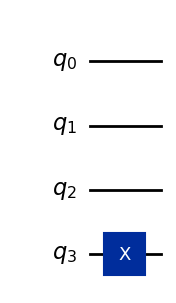

In [ ]:
def qc_Uf_c(n):
    qc = QuantumCircuit(n+1, name='Ufc')
    qc.x(n)
    return qc

qc = qc_Uf_c(3); qc.draw('mpl')

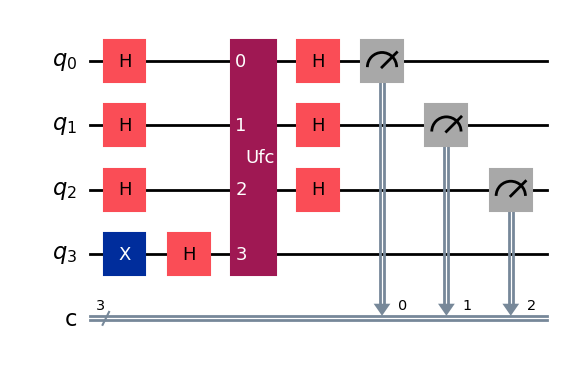

In [ ]:
qc = qc_deutsch_jozsa(3, 'c')
qc.draw('mpl')

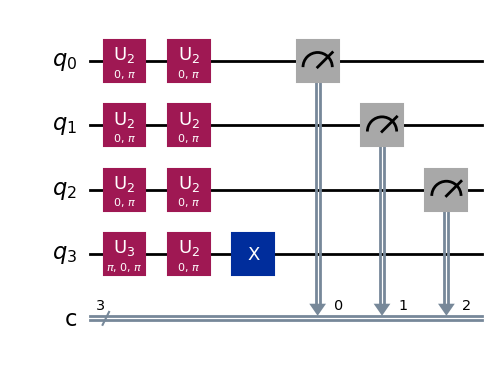

In [ ]:
qc = qc_deutsch_jozsa(3, 'c')
qc.decompose().draw('mpl')

### Simulação

In [ ]:
from qiskit_aer import AerSimulator # só há simulador local agora
backend = AerSimulator()

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

In [ ]:
qc = qc_deutsch_jozsa(3,'c')
qc_list = []
qc_list.append(qc.decompose()) # deu erro sem o decompose
job = sampler.run(qc_list, shots = 2**12)

In [ ]:
counts_sim = job.result()[0].data.c.get_counts()
counts_sim

{'000': 4096}

### Experimento

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum",
                               token="689bdd2f8ff92455b39626f1ec28cdf2683e7820ca33380c4ddef0537b244a6704548c5933d83fbb03a2aa4dfe99f2309458741f47713a5279ecbac3943993e9")
backend = service.backend(name="ibm_osaka")

In [ ]:
from qiskit import transpile
qc = qc_deutsch_jozsa(3,'c')
qc_list = []
qc_list.append(qc.decompose())
qc_transpiled_list = transpile(qc_list, backend=backend, optimization_level=1)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)
sampler.options.dynamical_decoupling.enable = True
sampler.options.dynamical_decoupling.sequence_type = "XY4"

In [ ]:
job = sampler.run(qc_transpiled_list)
print(job.job_id())

ct2s1wq2tw9g008knfy0


In [ ]:
# para cancelar um job usa:
job_id = "ct2rzzz2tw9g008knf90" # job do chip kyoto
job = service.job(job_id)
job.cancel() # ok!

In [ ]:
job_id = "ct2s1wq2tw9g008knfy0"
job = service.job(job_id)
counts_exp = job.result()[0].data.c.get_counts()
counts_exp

{'000': 3913, '100': 97, '001': 54, '010': 26, '011': 2, '110': 1, '101': 3}

In [ ]:
job.result()[0].data.c.num_shots

4096

### Gráfico

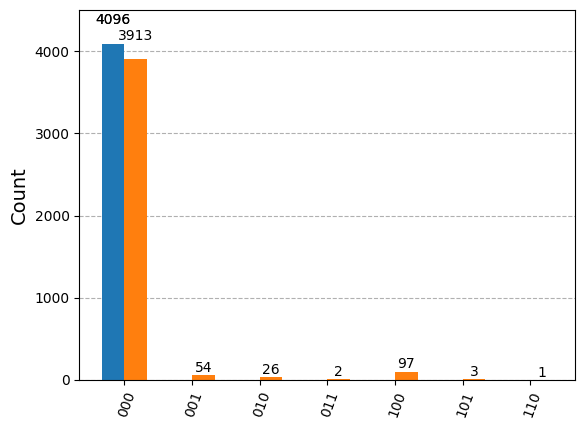

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram([counts_sim,counts_exp])

## Exemplo: Função balanceada
Vamos considerar $f:\{0,1\}^3\rightarrow \{0,1\}$ com
$$f_b = f(x)=\begin{cases}0 \text{ se } x\le 3 \\ 1 \text{ se } x> 3 \end{cases}.$$
Temos assim que
\begin{align}
U_f & = \sum_{x=0}^{2^3 -1}\sum_{y=0}^{2^1 -1} |x\rangle\langle x|\otimes|y\oplus f(x)\rangle\langle y| \\
& = \sum_{x=0}^{3}\sum_{y=0}^{1} |x\rangle\langle x|\otimes|y\oplus f(x)\rangle\langle y| + \sum_{x=4}^{7}\sum_{y=0}^{1} |x\rangle\langle x|\otimes|y\oplus f(x)\rangle\langle y| \\
& = \sum_{x=0}^{3}\sum_{y=0}^{1} |x\rangle\langle x|\otimes|y\oplus 0\rangle\langle y| + \sum_{x=4}^{7}\sum_{y=0}^{1} |x\rangle\langle x|\otimes|y\oplus 1\rangle\langle y| \\
& = \sum_{x=0}^{3} |x\rangle\langle x|\otimes\sum_{y=0}^{1}|y\rangle\langle y| + \sum_{x=4}^{7} |x\rangle\langle x|\otimes\sum_{y=0}^{1}|\overline{y}\rangle\langle y| \\
& = (|0\rangle\langle 0|+|1\rangle\langle 1|+|2\rangle\langle 2|+|3\rangle\langle 3|)\otimes I_2 + (|4\rangle\langle 4|+|5\rangle\langle 5|+|6\rangle\langle 6|+|7\rangle\langle 7|)\otimes X \\
& = (|000\rangle\langle 000|+|001\rangle\langle 001|+|010\rangle\langle 010|+|011\rangle\langle 011|)\otimes I_2 \\
& + (|100\rangle\langle 100|+|101\rangle\langle 101|+|110\rangle\langle 110|+|111\rangle\langle 111|)\otimes X \\
& = |0\rangle\langle 0|\otimes(|00\rangle\langle 00|+|01\rangle\langle 01|+|10\rangle\langle 10|+|11\rangle\langle 11|)\otimes I_2 \\
& + |1\rangle\langle 1|\otimes(|00\rangle\langle 00|+|01\rangle\langle 01|+|10\rangle\langle 10|+|11\rangle\langle 11|)\otimes X \\
& = |0\rangle\langle 0|\otimes I_4\otimes I_2 + |1\rangle\langle 1|\otimes I_4\otimes X \\
& = |0\rangle\langle 0|\otimes I\otimes I\otimes I + |1\rangle\langle 1|\otimes I\otimes I\otimes X \\
& \equiv C_X^{0_1\rightarrow 3}.
\end{align}

__Exercício:__ Considere $f:\{0,1\}^3\rightarrow \{0,1\}$ com
$$f_b = f(x)=\begin{cases}1 \text{ se } x\le 3 \\ 0 \text{ se } x> 3 \end{cases}.$$ Mostra que $U_f=C_X^{0_0\rightarrow 3}.$

__Exercício:__ Obtenha $U_f$ para uma caixa preta que implementa $f:\{0,1\}^3\rightarrow \{0,1\}$ com $f(x_{\text{par}})=0$ e $f(x_{\text{ímpar}})=1,$
com $x$ sendo a representação decimal da sequências de 3 bits.

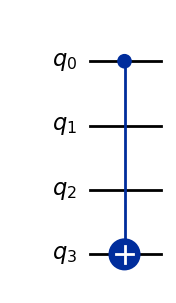

In [ ]:
def qc_Uf_b(n):
    qc = QuantumCircuit(n+1, name='Uf_b')
    qc.cx(0,n)
    return qc

qc = qc_Uf_b(3); qc.draw('mpl')

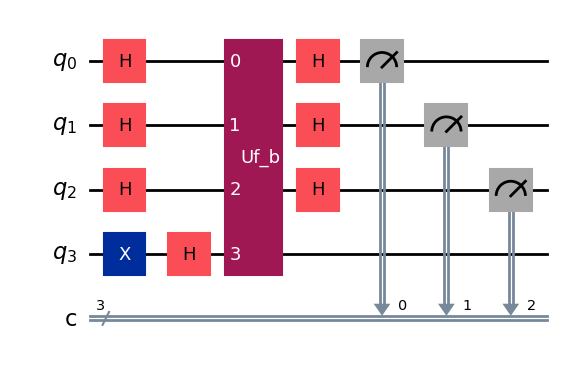

In [ ]:
qc = qc_deutsch_jozsa(3, 'b')
qc.draw('mpl')

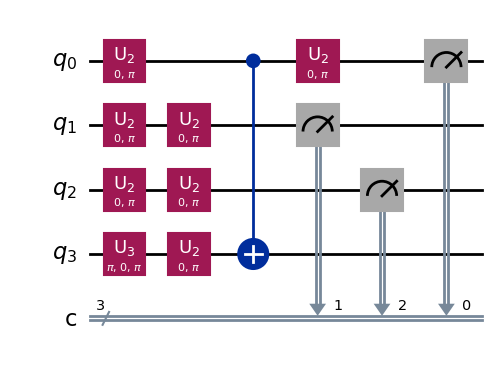

In [ ]:
qc = qc_deutsch_jozsa(3, 'b')
qc.decompose().draw('mpl')

### Simulação

In [ ]:
from qiskit_aer import AerSimulator
backend = AerSimulator()

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

In [ ]:
qc = qc_deutsch_jozsa(3,'b')
qc_list = []
qc_list.append(qc.decompose())
job = sampler.run(qc_list, shots = 2**12)

In [ ]:
counts_sim = job.result()[0].data.c.get_counts()
counts_sim

{'001': 4096}

### Experimento

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum",
                               token="689bdd2f8ff92455b39626f1ec28cdf2683e7820ca33380c4ddef0537b244a6704548c5933d83fbb03a2aa4dfe99f2309458741f47713a5279ecbac3943993e9")
backend = service.backend(name="ibm_osaka")

In [ ]:
from qiskit import transpile
qc = qc_deutsch_jozsa(3,'b')
qc_list = []
qc_list.append(qc.decompose())
qc_transpiled_list = transpile(qc_list, backend=backend, optimization_level=1)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)
sampler.options.dynamical_decoupling.enable = True
sampler.options.dynamical_decoupling.sequence_type = "XY4"

In [ ]:
job = sampler.run(qc_transpiled_list)
print(job.job_id())

ct2s60gezpa0008kea8g


In [ ]:
job_id = "ct2s60gezpa0008kea8g"
job = service.job(job_id)
counts_exp = job.result()[0].data.c.get_counts()
counts_exp

{'001': 3720, '000': 125, '101': 209, '011': 32, '100': 8, '010': 1, '111': 1}

### Gráfico

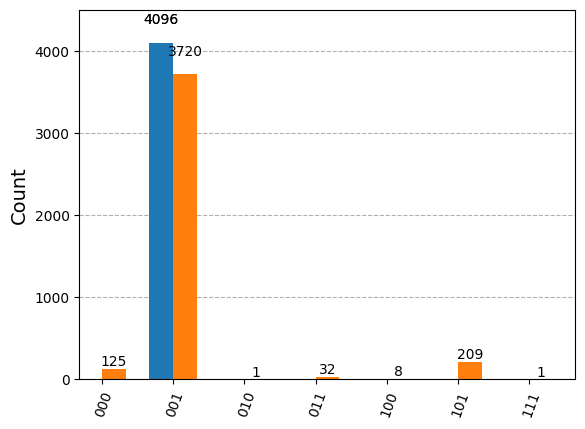

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram([counts_sim,counts_exp])

Nos dois casos, por causa dos erros e alta taxa de decoerência que temos na era NISQ (Noise Intermidiate Scale Quantum) da computação quântica, os resultados experimentais estão longe de serem perfeitos. Por isso precisamos criar algum critério para extrair a solução. Usar o estádo mais provável é uma boa possibilidade.

## Complexidade computacional do problema de Deutsch

### Algoritmo quântico

Para o problema de Deutsch com a caixa preta retornado uma função $f:\{0,1\}^n\rightarrow\{0,1\}$, usando o algoritmo quântico de Deutsch-Jozsa, em princípio, podemos determinar se a função é constante ou balanceada consultando a caixa preta uma única vez. Portanto, a complexidade computacional quântica é
$$CC_{Q}=\mathcal{O}(1).$$
 Vale observar, no entanto, que para computadores quânticos na era NISQ (Near Term Quantum Device), temos erros e decorência e por isso temos que fazer um certo número finito $N$ de medidas para estimar as probabilidades, e temos uma flutuação estatística associada a esse número. Existe assim uma relação de restrição entre o quão ruidoso é o computador quântico e o quão alto deve ser $N$. Quanto mais ruído, maior deve ser $N$. Certamente é suficiente fazer um número de medidas proporcional ao número $n$ de qubits, que é igual ao tamanho das strings de números que mandamos para a caixa preta (usualmente chamado de tamanho do problema). Com isso, a complexidade computacional quântica seria
 $$CC_{QN}=\mathcal{O}(n).$$

### Algoritmo clássico determinístico

No caso de um algoritmo clássico determinístico, se a função é constante temos que consultar a caixa preta
$$N_c(C)2^{n-1}+1$$
vezes para ter certeza disso. Se a função é balanceada, na melhor da hipóteses podemos identificar isso com 2 consultas (e.g. $1ª$ consulta retorna $f(x)=0$ e a $2ª$ retorna $f(x)=1$). No entanto, na pior da hipóteses, podemos precisar de $2^{n-1}+1$ consultas (e.g. as $2^{n-1}$ primeiras consultas retornam $f(x)=0$ e a consulta de número $2^{n-1}+1$ retorna $f(x)=1$). Como a probabilidade de qualquer um dos números de consultas ser necessário é a mesma, $1/2^{n-1}$, que é o número de possibilidades para os números de consultas, temos que fazer em média o seguinte número de consultas:
\begin{align}
N_c(B) & = \Big(\frac{1}{2^{n-1}}2 + \frac{1}{2^{n-1}}3 + \cdots + \frac{1}{2^{n-1}}2^{n-1} + \frac{1}{2^{n-1}}\big(2^{n-1}+1\big)\Big) \\
& = \frac{1}{2^{n-1}}\Big(1 + 2 + 3 + \cdots + 2^{n-1} + 2^{n-1}\Big) \\
& = \frac{1}{2^{n-1}}\Big(\frac{2^{n-1}\big(2^{n-1}+1\big)}{2} + 2^{n-1}\Big) \\
& = \frac{\big(2^{n-1}+1\big)}{2} + 1 \\
& = 2^{n-2}+1/2 + 1, \\
\end{align}
em que usamos a série
$$\sum_{j=1}^{N}j = \frac{N(N+1)}{2}.$$

Então, considerando que funções constantes e balanceadas occurrem com a mesma probabilidade, teremos o número de consultas médio
\begin{align}
\langle N_c\rangle & = \frac{1}{2}N_c(C) + \frac{1}{2}N_c(B) \\
& = \frac{1}{2}(2^{n-1}+1) + \frac{1}{2}(2^{n-2}+1/2 + 1) \\
& = 2^{n-2} + 2^{n-3} \frac{1}{2} + \frac{1}{4}.
\end{align}

para $n\gg 1$, a complexidade computacional determinística clássica é
$$CC_{CD} = \mathcal{O}(2^{n-2}),$$
ou seja, cresce exponencialmente com $n$.

Dizemos que exite uma separação exponencial entre a complexidade do algoritmo quântico e o algoritmo clássico determinístico, com o quântico sendo muito mais eficiente, para $n\gg 1.$

### Algoritmo clássico probabilístico

No entanto, podemos usar um algoritmo clássico probabilístico. Um técnica probabilística simples é consultar a caixa preta para dois elementos, $x$ e $x'$, do domínio $\{0,1\}^n = \{0,1,2,\cdots,2^n-2,2^n-1\}$ sorteados aleatoriamente. Se $f(x)=f(x')$, concluímos que a função é constante, se $f(x)\ne f(x')$ concluímos que a função é balanceada.

Usando esse procedimento, se a função é _constante_ acertaremos sempre, com probabilidade igual a $1$:
$$p_{acerto}(C) = 1.$$

Se a função é _balanceada_, a probabilidade de acerto é dada, por exemplo, por
\begin{align}
p_{acerto}(B) & = Pr(0,1) + Pr(1,0) \\
& = 2Pr(0,1) \\
& = 2Pr(0)Pr(1|0),
\end{align}
em que usamos a notação
\begin{align}
& Pr(0) = Pr(f(x)=0),\\
& Pr(j,k) = Pr(f(x)=j,f(x')=k),\\
& Pr(1|0) = Pr(f(x')=1|f(x)=0),
\end{align}
e temos que
$$Pr(0,1) = Pr(1,0)$$
pela simetria do problema.

Temos que $Pr(0)Pr(1|0)$ é o produto da probabilidade de obtermos $f(x)=0$ no 1º sorteiro pela probabilidade de obtermos $f(x')=1$ no 2º sorteio condicionada em termos obtido $f(x)=0$ no 1º sorteio. Para o 1º sorteio temos $2^n$ possibilidades para $x$ e temos $2^{n-1}$ valores de $x$ tais que $f(x)=0$. Com isso, vem que
$$Pr(0) = Pr(f(x)=0) = \sum_{j=1}^{2^{n-1}}\frac{1}{2^n} = \frac{2^{n-1}}{2^n} = \frac{1}{2}.$$
Para o 2º sorteio temos $2^n -1$ possibilidades de valores de $x'$ e $2^{n-1}$ valores de $x'$ tais que $f(x')=1$. Assim
$$Pr(1|0) = Pr(f(x')=1|f(x)=0) = \sum_{j=1}^{2^{n-1}}\frac{1}{2^n -1} = \frac{2^{n-1}}{2^n - 1} \approx \frac{1}{2}$$
para $n\gg 1.$ Por conseguinte
$$p_{acerto}(B) \approx 2\frac{1}{2}\frac{1}{2} = \frac{1}{2}.$$

Somando as probabilidades de acertos para os dois tipos de funções, constante e balanceada, pesadas pelas probabilidades dessas funções aparecerem (assumimos que elas aparecem com mesma probabilidade) obtemos a probilidade de acerto média:
$$p_{acerto} = \frac{1}{2}p_{acerto}(C) + \frac{1}{2}p_{acerto}(B) = \frac{1}{2} + \frac{1}{2}\frac{1}{2} = \frac{3}{4}.$$

Por fim, é importante notar para aplicar algoritmos não determinísticos como esse, devemos estabelecer um critério. Aqui usaremos o __voto da maioria__. Ou seja, aplicamos o algoritmo $k$ vezes, e escolhemos como resposta aquela que aparece mais vezes.

Como para este algoritmo a probabilidade de acerto é de $3/4$, em $75%$ das vezes estaremos certos. Por conseguinte, fazer um certo número $N_j$, independente de $n$, de consultas, é suficiente para inferirmos que a função é balanceada com uma probabilidade de acerto grande. Como esse número não depende de $n$, dizemos que a complexidade computacional do algoritmo clássico probabilístico é constante, o que é denotado por
$$CC_{CP} = \mathcal{O}(1).$$

Com isso, vemos que o algoritmo de Deutsch-Jozsa não tem vantagem computacional significativa (é um vantagem constante) sobre algoritmos clássicos probabilísticos.


### Algoritmos com erro limitado

Consideremos o problema de consulta a uma caixa preta. Consideremos um algoritmo que resolve esse problema mas que pode falhar com probabilidade
$$p_{erro} = \frac{1}{2} -\delta,$$
com
$$\delta\in(0,1/2)$$
 sendo uma constante fixa. A probabilidade de acerto é então
$$p_{acerto} = \frac{1}{2} + \delta.$$

Agora vamos supor que o algoritmo é usado $k$ vezes. A probabilidade do algoritmo acertar $j$ vezes e falhar $k-j$ vezes é dada por
$$\binom{k}{j}\Big(\frac{1}{2} -\delta\Big)^j\Big(\frac{1}{2} +\delta\Big)^{k-j},$$
pois $\binom{k}{j}$ é igual ao número de sequências (de possibilidades) com $j$ acertos e com $k-j$ erros. Os expoentes aparecem porque estamos multiplicando as probabilidades individuais dos acertos e dos erros.

Usando análise Bayesiana, porque estamos usando voto da maioria para decidir o resultado (para $j>k/2$ acertamos mais que erramos, e isso conta como um acerto no final), vemos que a probabilidade de erro é, aproximadamente, dada por
$$p_{erro} \approx \sum_{j=0}^{k/2}\binom{k}{j}\Big(\frac{1}{2} -\delta\Big)^j\Big(\frac{1}{2} +\delta\Big)^{k-j}.$$

Mais especificamente, no lugar de $k/2$ acima e doravante deveríamos usar a função floor de $k/2$, ou seja o inteiro menor mais próximos de $k/2$, que denotamos por $\lfloor k/2\rfloor$.

Como pode ser visualizado nos gráficos abaixo, o termo com maior contribuição para a expressão acima é
$$j\approx k/2.$$
O termo associado a essa probabilidade é
\begin{align}
& \Big(\frac{1}{2} -\delta\Big)^{k/2}\Big(\frac{1}{2} +\delta\Big)^{k/2} = \Big(\frac{1-2\delta}{2} \Big)^{k/2}\Big(\frac{1+2\delta}{2} \Big)^{k/2} \\
& = \Big(\frac{(1-2\delta)}{2}\frac{(1+2\delta)}{2} \Big)^{k/2} = \Big(\frac{1-4\delta^2}{4}\Big)^{k/2} \\
& = \frac{(1-4\delta^2)^{k/2}}{2^k}.
\end{align}


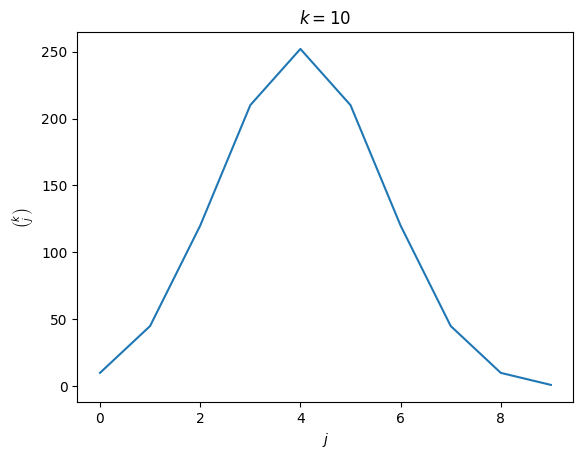

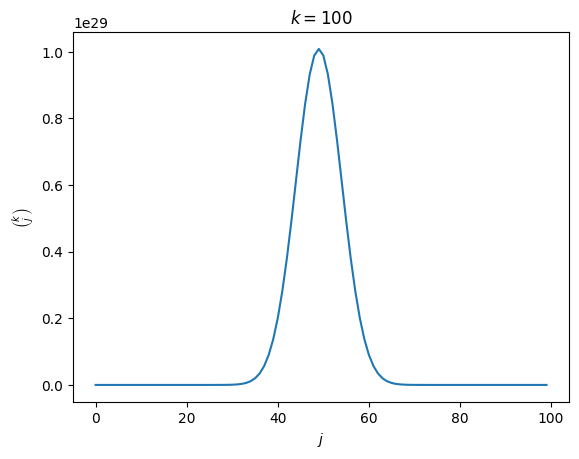

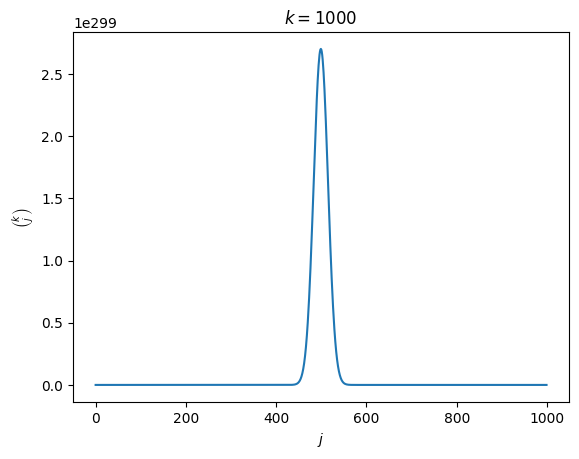

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

def plot_binom(k):
  x = np.arange(0,k,1)
  y = np.zeros(len(x))
  for j in range(0,k,1):
   y[j] = math.factorial(k)/(math.factorial(j+1)*math.factorial(k-j-1))
  plt.plot(x,y)
  plt.xlabel(r'$j$')
  plt.ylabel(r'$\binom{k}{j}$')
  plt.title(r'$k=$'+str(k))
  plt.show()

pl = []
pl.append(plot_binom(10**1))
pl.append(plot_binom(10**2))
pl.append(plot_binom(10**3))

Como existem $2^k$ termos desses, pois
$$\sum_{j=0}^k \binom{k}{j} = 2^k,$$
vemos que
\begin{align}
p_{erro} & \le 2^k\frac{(1-4\delta^2)^{k/2}}{2^k} \\
& = (1-4\delta^2)^{k/2} \\
& \le (e^{-4\delta^2})^{k/2} \\
& = e^{-2\delta^2 k}.
\end{align}
Esse limite é conhecido como _limite de Chernoff_. Vemos assim que a probabilidade de erro decai exponencialmente com o número de vezes que o algoritmo estocástico é repetido.

O que o limite de Chernoff significa na prática pode ser visto considerando o algoritmo clássico não determinístico que vimos anteriormente para a solução do problema de Deutsch no caso da caixa preta $f:\{0,1\}^n\rightarrow\{0,1\}$. Para esse algoritmo, temos
$$\delta = \frac{1}{4}.$$
Com isso, vem que
$$p_{erro} = e^{-k/8}$$
e assim
\begin{align}
& p_{erro}(k=10)\approx 0.29,\\
& p_{erro}(k=100)\approx 3.73\times 10^{-6},\\
& p_{erro}(k=1000)\approx 5.17\times 10^{-55}.
\end{align}
Ou seja, com um número razoavelmente pequeno de repetições da aplicação do algoritmo, teremos uma chance muito grande de acertar a solução do problema.

Na verdade, e muito interessantemente, se tivermos um algoritmo, clássico ou quântico, com erro limitado menor que $1/2$, podemos dizer que efetivamente temos uma solução eficiente para o problema.

In [4]:
def p_erro(k, de):
  return math.exp(-2*(de**2)*k)

de = 1/4
p_erro(10, de), p_erro(100, de), p_erro(1000, de)

(0.2865047968601901, 3.726653172078671e-06, 5.166420632837861e-55)

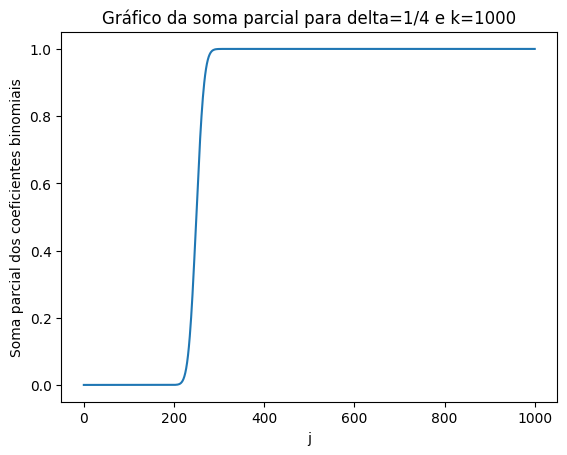

In [9]:
import matplotlib.pyplot as plt
from scipy.special import binom
import numpy as np

# Definindo delta e k
delta = 1/4
k = 1000

# Criando uma lista de valores de j de 0 a k/2
j_values = np.arange(0, k + 1)

# Calculando a soma parcial dos coeficientes binomiais para cada j
sum_partial = [sum(binom(k, j) * ((1/2 - delta)**j) * ((1/2 + delta)**(k - j)) for j in range(0, i+1)) for i in j_values]

# Plotando o gráfico
plt.plot(j_values, sum_partial)
plt.title('Gráfico da soma parcial para delta=1/4 e k=1000')
plt.xlabel('j')
plt.ylabel('Soma parcial dos coeficientes binomiais')
plt.show()

## Referências

1. D. Deutsch and R. Jozsa, “Rapid solution of problems by quantum computation,” Proceedings of the Royal Society of London. Series A: Mathematical and Physical Sciences, vol. 439, no. 1907, pp. 553-558, Jan. 1992, doi: 10.1098/rspa.1992.0167.

1. M. A. Nielsen and I. L. Chuang, Quantum Computation and Quantum Information (Cambridge University Press, Cambridge, England, 2000).

1. Richard Cleve, Introduction to Quantum Information Processing (2023), https://cs.uwaterloo.ca/~cleve/courses/F11CS667/, https://youtube.com/playlist?list=PLgOc9DWm_Ey3cnHXjmu8f__ki5AJYd53p&si=etCdYsFeCUBTgclj.

1. Dave Bacon, Lecture Notes on Quantum Computing (2006), https://courses.cs.washington.edu/courses/cse599d/06wi/.

1. John Preskill, Lecture Notes on Quantum Computation, http://theory.caltech.edu/~preskill/ph219/index.html#lecture.

1. A. N. Oliveira, E. V. B. de Oliveira, A. C. Santos, and C. J. Villas-Bôas, “Quantum Algorithms in IBMQ Experience: Deutsch-Jozsa algorithm,” Rev. Bras. Ensino Fís., vol. 44, p. e20210333, 2022, doi: 10.1590/1806-9126-RBEF-2021-0333.

1. A. Javadi-Abhari et al., “Quantum computing with Qiskit.” arXiv, May 14, 2024. doi: 10.48550/arXiv.2405.08810.
